<a href="https://colab.research.google.com/github/2147118Joshua/NLP/blob/main/KMeans_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

In [15]:
import pandas as pd
import io
df=pd.read_csv('survey.csv')
print(df)

                Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  .

In [16]:
df.isnull().any().any()
df = df.fillna(0)

In [17]:
import numpy as np
df.replace(to_replace=np.nan,value=0)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,0,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,0
1,2014-08-27 11:29:37,44,M,United States,IN,0,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,0
2,2014-08-27 11:29:44,32,Male,Canada,0,0,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,0
3,2014-08-27 11:29:46,31,Male,United Kingdom,0,0,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,0
4,2014-08-27 11:30:22,31,Male,United States,TX,0,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,0,No,No,Yes,0,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,0
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,0
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,0
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,0,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,0


In [25]:
for feature in df.columns:
    df[feature].replace('',np.nan,inplace=True )
    df[feature].fillna(value=0,inplace=True)
for feature in df.columns:
    df[feature].replace(0,df[feature].median(),inplace=True)
df.head()

TypeError: ignored

In [22]:
# Remove columns with all na values
all_na = df.columns[df.isna().all()]
df.drop(all_na, axis = 1, inplace = True)

In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [38]:
df['obs_consequence']= df['obs_consequence'].map({'No': '0', 'Yes': '1'})

In [39]:
x = df[['Age','obs_consequence']]

x

,Age,obs_consequence
0,37,0
1,44,0
2,32,0
3,31,1
4,31,0
...,...,...
1254,26,0
1255,32,0
1256,34,0
1257,46,0


In [40]:
kmeans = KMeans(3)


In [41]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [50]:
df['Age'] = df['Age'].astype(str)
df['obs_consequence'] = df['obs_consequence'].astype(str)

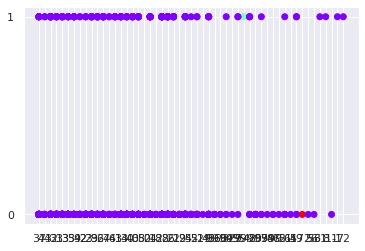

In [52]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Age'],data_with_clusters['obs_consequence'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

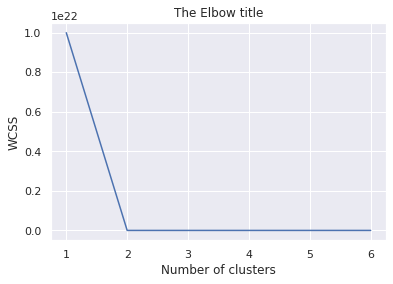

In [53]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)


number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [54]:
df.isnull().any().any()
df = df.fillna(0)

In [58]:
df1=df[['Age','obs_consequence']]
x = df1
x
kmeans = KMeans(3)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters
df['Age'] = df['Age'].astype(str)
df['obs_consequence'] = df['obs_consequence'].astype(str)
data_with_clusters = df.copy()
data_with_clusters['Age'] = identified_clusters 
plt.scatter(data_with_clusters['Age'],data_with_clusters['obs_consequence'],c=data_with_clusters['Clusters'],cmap='rainbow')

KeyError: ignored